In [1]:
import sys

from qetu_sim import *

import numpy as np
import scipy.linalg
import itertools
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.transpiler import Layout
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import Permutation
from qiskit.visualization import *
from qiskit_aer import AerSimulator

In [2]:
u = 1
t = 1
delta_t = 1
n = 1
num_sites = 4

In [3]:
H_ref = ref_fh_hamiltonian(u=u, t=t, WMI_qubit_layout=True, include_aux=True)
λ, v = np.linalg.eigh(H_ref)
ground_state_energy = λ[0]
ground_state_vector = v[:,0]

In [4]:
u = 1
t = 1
delta_t = 1
degree_list = range(1,51,1)
trotter_steps_list = range(1,2)
overlap_list = []
overlap_noise_list = []

for degree in degree_list:
    E_min, E_mu_m, E_mu_p, E_max = calculate_qsp_params(u, t)
    qsp = QSPPhase()
    phi_seq_su2 = qsp.cvx_qsp_heaviside(
        degree, 
        E_min,
        E_mu_m, 
        E_mu_p, 
        E_max
    )
    for trotter_steps in trotter_steps_list:
        print("Degree: " + str(degree) + "\t Trotter steps: " + str(trotter_steps))
        print("-------------------------")
        #phi_vec = convert_Zrot_to_Xrot(phi_seq_su2)
        phi_vec = phi_seq_su2
        QETU_circ = construct_QETU_circ(u, t, trotter_steps, phi_vec)
        QETU_circ_WMI = transpile_QETU_to_WMI(QETU_circ)
        final_state = qetu_sim(QETU_circ_WMI)
        success_probability = scipy.linalg.norm(final_state)**2
        overlap = abs(np.vdot(final_state, ground_state_vector))**2
        print("success probability: " + str(success_probability))
        print("overlap: " + str(overlap))
        noise_model = wmi_grid_noise_model()
        final_state_noise = qetu_sim(QETU_circ_WMI, noise_model)
        overlap_noise = abs(np.vdot(final_state_noise, ground_state_vector))**2
        print("overlap noise: " + str(overlap_noise))
        overlap_list.append(overlap)
        overlap_noise_list.append(overlap_noise)


starting matlab engine..
Degree: 1	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999991
overlap: 0.12773000689607864
overlap noise: 0.09098690630511701

starting matlab engine..

stopping matlab engine..
Degree: 2	 Trotter steps: 1
-------------------------
success probability: 1.0
overlap: 0.22970645928354794
overlap noise: 7.767704019117576e-33

starting matlab engine..

stopping matlab engine..
Degree: 3	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999998
overlap: 0.20518397390686458
overlap noise: 8.015382223982256e-05

starting matlab engine..

stopping matlab engine..
Degree: 4	 Trotter steps: 1
-------------------------
success probability: 1.0000000000000004
overlap: 0.187265188275207
overlap noise: 5.447250710971628e-33

starting matlab engine..

stopping matlab engine..
Degree: 5	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999993
overlap: 0.2858555304393984
overlap noise: 6.342313

Text(0, 0.5, 'overlap')

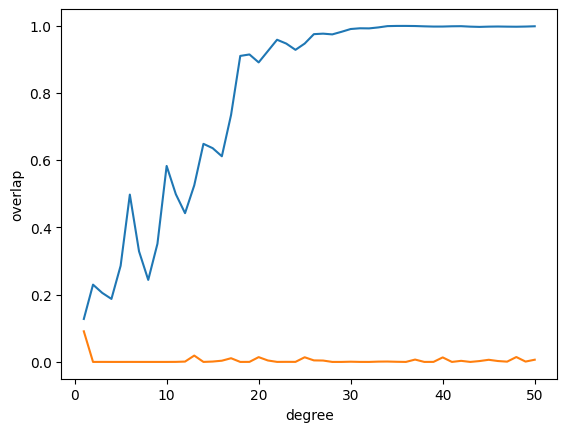

In [5]:
plt.plot(degree_list, overlap_list)
plt.plot(degree_list, overlap_noise_list)
plt.xlabel("degree")
plt.ylabel("overlap")